In [2]:
import pqmodel
import matplotlib.pyplot as plt
import random
import numpy as np
import pandas as pd

In [4]:
num_total_samples = 1000
imbalance_ratio = 0.5 # Ratio of normal samples
sampling_frequency = 16000
fundemental_frequency = 50
num_cycles = 10
amplitude = 1
alternative_class = 2

# full_df = pqmodel.pqmodel_df(num_samples=num_total_samples*max(imbalance_ratio,1-imbalance_ratio),
#                        samp_freq=sampling_frequency,
#                        fund_freq=fundemental_frequency,
#                        num_cycles=num_cycles,
#                        amplitude=amplitude)


# Append all of the normal samples to the data_df
data_df = full_df[full_df['class']==1].iloc[:int(num_total_samples*imbalance_ratio)]
# Append random sample of abnormal data to data_df (from all classes of disturbances)
abnormal_df = full_df[full_df['class']==alternative_class].iloc[:int(num_total_samples*(1-imbalance_ratio))]
data_df = data_df.append(abnormal_df).reset_index()

data_df

,index,id,class,s0,s1,s2,s3,s4,s5,s6,...,s3190,s3191,s3192,s3193,s3194,s3195,s3196,s3197,s3198,s3199
0,0,0,1,-0.918443,-0.926032,-0.933264,-0.940136,-0.946646,-0.952791,-0.958569,...,-0.823626,-0.834603,-0.845257,-0.855585,-0.865584,-0.875249,-0.884577,-0.893563,-0.902205,-0.910500
1,1,1,1,-0.557961,-0.574147,-0.590111,-0.605848,-0.621352,-0.636615,-0.651634,...,-0.385341,-0.403384,-0.421272,-0.438997,-0.456553,-0.473933,-0.491130,-0.508138,-0.524950,-0.541560
2,2,2,1,0.715879,0.702032,0.687915,0.673532,0.658890,0.643994,0.628849,...,0.838340,0.827475,0.816291,0.804793,0.792984,0.780869,0.768454,0.755742,0.742739,0.729449
3,3,3,1,-0.517798,-0.534495,-0.550986,-0.567265,-0.583324,-0.599159,-0.614763,...,-0.340949,-0.359340,-0.377593,-0.395701,-0.413656,-0.431451,-0.449080,-0.466536,-0.483812,-0.500902
4,4,4,1,-0.739036,-0.725667,-0.712018,-0.698095,-0.683902,-0.669446,-0.654732,...,-0.856261,-0.845954,-0.835321,-0.824367,-0.813094,-0.801508,-0.789613,-0.777413,-0.764914,-0.752120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,995,2,0.505023,0.487980,0.470748,0.453335,0.435748,0.417992,0.400075,...,0.663703,0.648889,0.633825,0.618516,0.602970,0.587190,0.571185,0.554959,0.538519,0.521872
996,996,996,2,0.254930,0.273865,0.292696,0.311413,0.330010,0.348481,0.366816,...,0.061387,0.080971,0.100525,0.120040,0.139509,0.158923,0.178277,0.197562,0.216770,0.235895
997,997,997,2,-0.998617,-0.997392,-0.995783,-0.993790,-0.991414,-0.988656,-0.985516,...,-0.989685,-0.992307,-0.994547,-0.996403,-0.997874,-0.998961,-0.999663,-0.999980,-0.999911,-0.999457
998,998,998,2,-0.580157,-0.596037,-0.611687,-0.627101,-0.642274,-0.657199,-0.671870,...,-0.410107,-0.427935,-0.445598,-0.463088,-0.480401,-0.497528,-0.514463,-0.531200,-0.547732,-0.564053


In [5]:
train_data = data_df[[f's{i}' for i in range(int(sampling_frequency*num_cycles/fundemental_frequency))]].to_numpy()
train_data = train_data.reshape(-1, train_data.shape[1], 1)
train_labels = np.array(data_df['class']!=1)

In [6]:
train_data.shape

(1000, 3200, 1)

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalAveragePooling1D, Dense, Dropout

model_m = Sequential()
model_m.add(Conv1D(100, 10, activation='relu', input_shape=(train_data.shape[1], 1)))
model_m.add(Conv1D(100, 10, activation='relu'))
model_m.add(MaxPooling1D(3))
model_m.add(Conv1D(160, 10, activation='relu'))
model_m.add(Conv1D(160, 10, activation='relu'))
model_m.add(GlobalAveragePooling1D())
model_m.add(Dropout(0.5))
model_m.add(Dense(2, activation='softmax'))
print(model_m.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 3191, 100)         1100      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 3182, 100)         100100    
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 1060, 100)         0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 1051, 160)         160160    
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 1042, 160)         256160    
_________________________________________________________________
global_average_pooling1d (Gl (None, 160)               0         
_________________________________________________________________
dropout (Dropout)            (None, 160)               0

In [29]:
from tensorflow.keras.utils import to_categorical

model_m.compile(loss='categorical_crossentropy',
                optimizer='adam', metrics=['accuracy'])

EPOCHS = 15

history = model_m.fit(train_data[:],
                      to_categorical(train_labels[:]),
                      epochs=EPOCHS)

Train on 1000 samples
Epoch 1/15
1000/1000 [==============================] - 38s 38ms/sample - loss: 0.2980 - accuracy: 0.8860
Epoch 2/15
1000/1000 [==============================] - 38s 38ms/sample - loss: 0.1891 - accuracy: 0.9360
Epoch 3/15
1000/1000 [==============================] - 36s 36ms/sample - loss: 0.1395 - accuracy: 0.9540
Epoch 4/15
1000/1000 [==============================] - 40s 40ms/sample - loss: 0.1490 - accuracy: 0.9430
Epoch 5/15
1000/1000 [==============================] - 35s 35ms/sample - loss: 0.2129 - accuracy: 0.9240
Epoch 6/15
1000/1000 [==============================] - 35s 35ms/sample - loss: 0.1469 - accuracy: 0.9520
Epoch 7/15
1000/1000 [==============================] - 36s 36ms/sample - loss: 0.1037 - accuracy: 0.9650
Epoch 8/15
1000/1000 [==============================] - 35s 35ms/sample - loss: 0.1161 - accuracy: 0.9610
Epoch 9/15
1000/1000 [==============================] - 35s 35ms/sample - loss: 0.1118 - accuracy: 0.9680
Epoch 10/15
1000/1000 [=

In [13]:
model_m.save_weights('pqd_model_weights.h5')

Class: 1


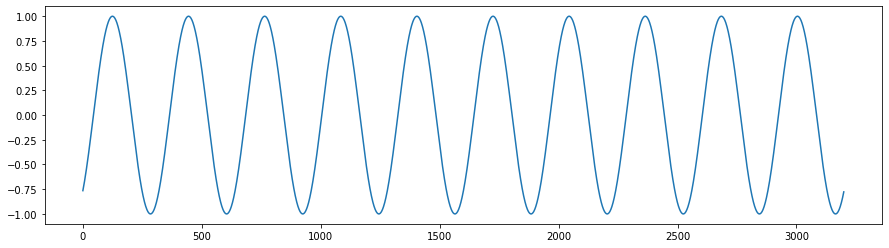

In [26]:
plt.rcParams["figure.figsize"] = (15,4)

# stuff = pqmodel.pqmodel_df(num_samples=30)

index = 406
print('Class:', data_df['class'][index])
plt.plot(list(data_df.iloc[index,3:]))